**CAB 203: DATA VISUALISATION 📊**



**Project : Visualisations on the data of Riots and Protests in India btw 2016 - 2022 here we get to know about the most affect areas of the country and the types of poeople involved in the events and most important part is the type of event occueing be it a peacful event or the burst of anger and agoney among the citizens**

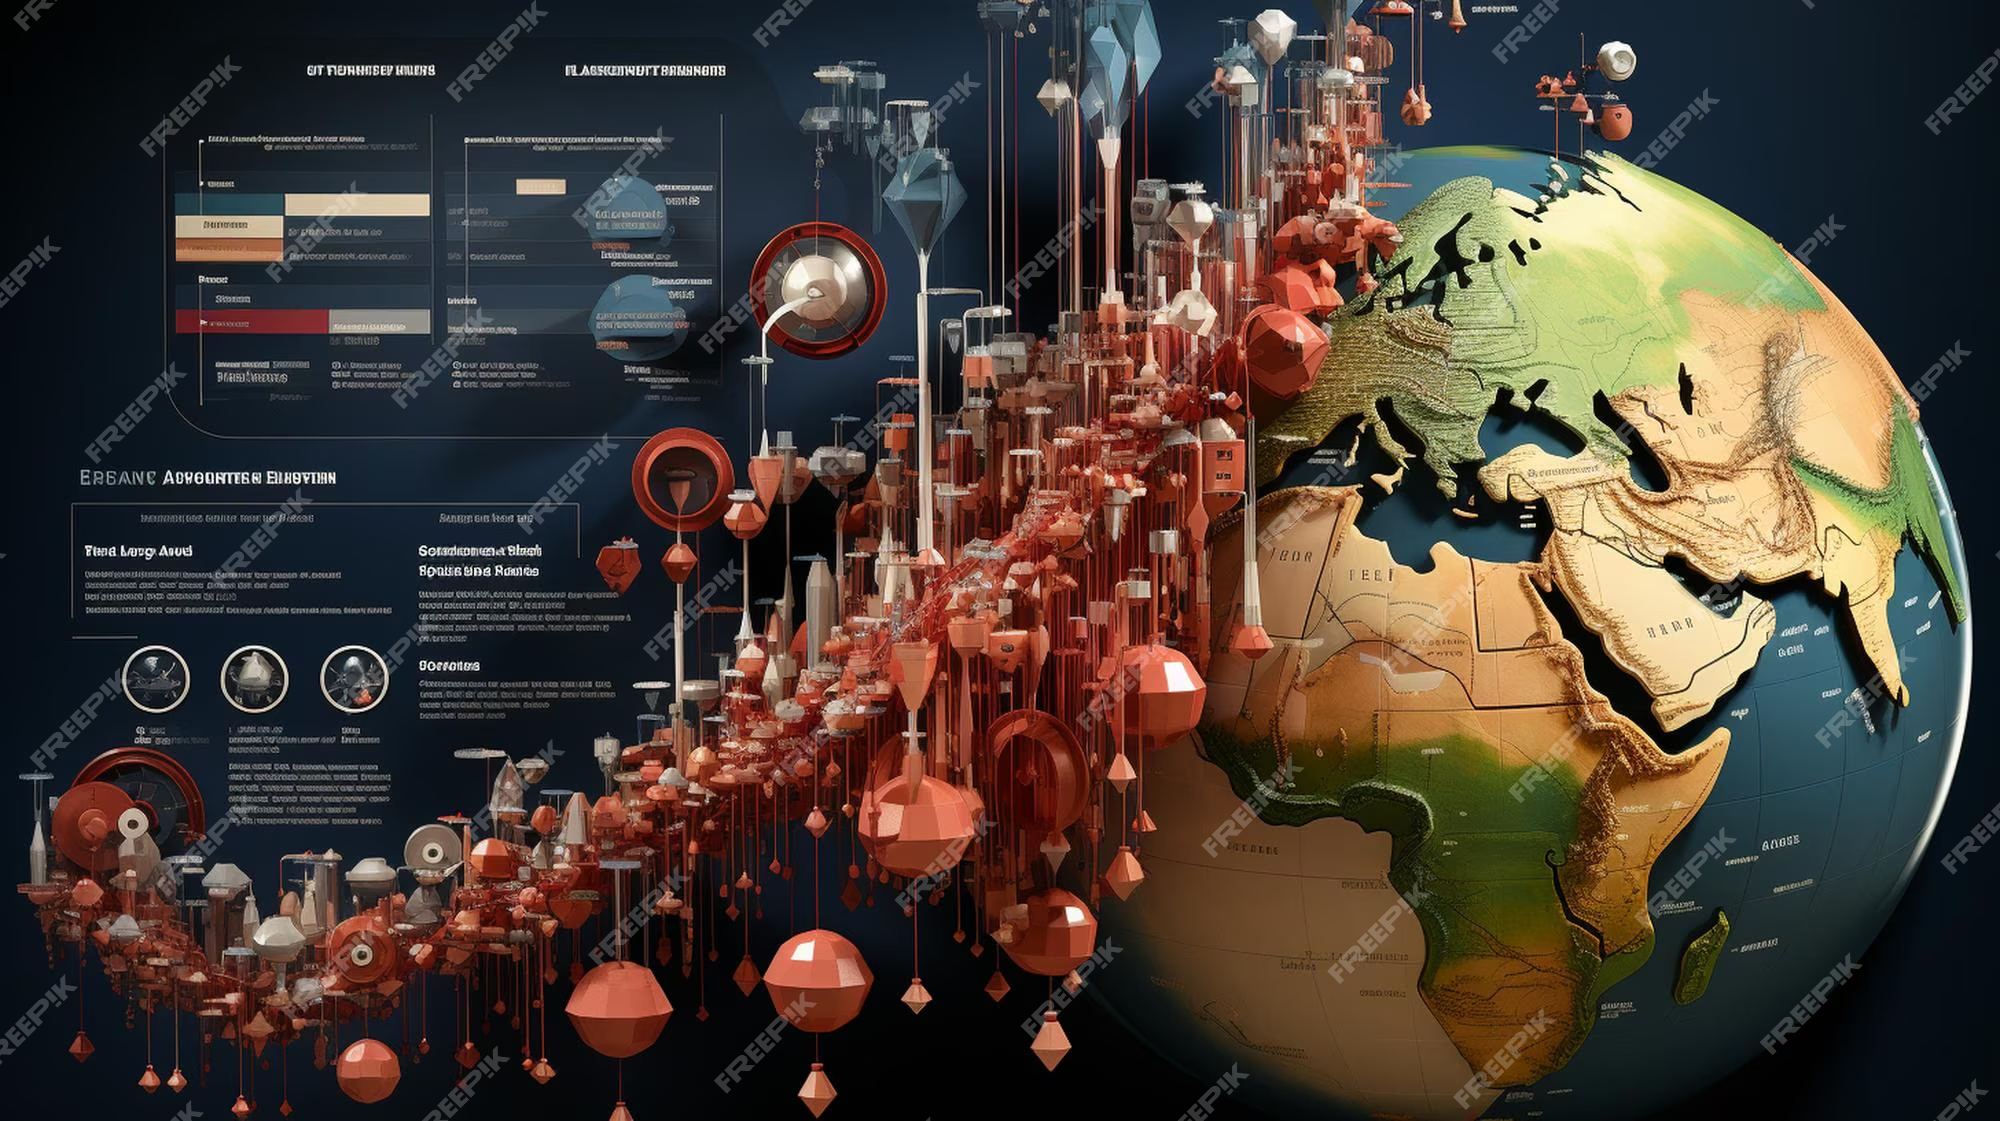

**Imports essential libraries for data manipulation, visualization, and mapping.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings
pd.set_option('display.max_columns', None)

import folium
from folium.plugins import HeatMap

from folium.plugins import MarkerCluster

In [5]:
ca=pd.read_csv("Dataset.csv")
ca.head()


data_id  iso event_id_cnty  event_id_no_cnty event_date  year  \
0  8912977  356     IND107923          107923.0  18-Mar-22  2022   
1  8912990  356     IND107846          107846.0  18-Mar-22  2022   
2  8913012  356     IND107941          107941.0  18-Mar-22  2022   
3  8913089  356     IND107842          107842.0  18-Mar-22  2022   
4  8913091  356     IND107850          107850.0  18-Mar-22  2022   

   time_precision event_type    sub_event_type              actor1  \
0               1      Riots      Mob violence     Rioters (India)   
1               1   Protests  Peaceful protest  Protesters (India)   
2               1   Protests  Peaceful protest  Protesters (India)   
3               1   Protests  Peaceful protest  Protesters (India)   
4               1      Riots      Mob violence     Rioters (India)   

                                       assoc_actor_1  inter1  \
0  Singraur Caste Group (India); Rajput Caste Gro...       5   
1                               Labour Group (India)       6   
2                                                NaN       6   
3                             Health Workers (India)       6   
4                        Government of India (2014-)       5   

              actor2                                      assoc_actor_2  \
0    Rioters (India)  Sonkar Caste Group (India); Dalit Caste Group ...   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4  Civilians (India)                 Former Government of India (2014-)   

   inter2  interaction      region country          admin1       admin2  \
0       5           55  South Asia   India   Uttar Pradesh     Fatehpur   
1       0           60  South Asia   India     Maharashtra  Mumbai City   
2       0           60  South Asia   India          Punjab      Sangrur   
3       0           60  South Asia   India  Madhya Pradesh       Indore   
4       7           57  South Asia   India  Madhya Pradesh        Bhind   

        admin3              location  latitude  longitude  geo_precision  \
0        Khaga             Kishanpur   25.6422    81.0244              1   
1  Mumbai City  Mumbai - Azad Maidan   18.9388    72.8321              1   
2   Malerkotla             Ahmedgarh   30.6785    75.8272              1   
3       Indore                Indore   22.7179    75.8333              1   
4        Bhind               Kanavar   26.5622    78.9797              1   

                       source source_scale  \
0                  Amar Ujala  Subnational   
1    Asian News International     National   
2          Chandigarh Tribune     National   
3  Free Press Journal (India)     National   
4  Free Press Journal (India)     National   

                                               notes  fatalities   timestamp  \
0  On 18 March 2022, members of two caste groups ...           0  1647961433   
1  On 18 March 2022, aircraft technicians, employ...           0  1647961433   
2  On 18 March 2022, activists of various organis...           0  1647961433   
3  On 18 March 2022, doctors staged a protest at ...           0  1647961433   
4  On 18 March 2022, around half a dozen persons,...           1  1647961433   

  iso3  
0  IND  
1  IND  
2  IND  
3  IND  
4  IND

In [6]:
ca.info

<bound method DataFrame.info of         data_id  iso event_id_cnty  event_id_no_cnty event_date  year  \
0       8912977  356     IND107923          107923.0  18-Mar-22  2022   
1       8912990  356     IND107846          107846.0  18-Mar-22  2022   
2       8913012  356     IND107941          107941.0  18-Mar-22  2022   
3       8913089  356     IND107842          107842.0  18-Mar-22  2022   
4       8913091  356     IND107850          107850.0  18-Mar-22  2022   
...         ...  ...           ...               ...        ...   ...   
107685  5494159  356          IND9               9.0  01-Jan-16  2016   
107686  5603486  356      IND51303           51303.0  01-Jan-16  2016   
107687  6072644  356      IND49232           49232.0  01-Jan-16  2016   
107688  6257234  356         IND10              10.0  01-Jan-16  2016   
107689  8543376  356      IND49233           49233.0  01-Jan-16  2016   

        time_precision event_type    sub_event_type  \
0                    1      Riots   

In [7]:
ca.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty    float64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3               object
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

In [8]:

ca.rename(columns={'admin1':'State',
                   'admin2':'District',
                   'admin3':'local_area',
                   'event_date':'Date',
                    'iso':'Country_code',
                    'actor1':'Main_actor',
                    'assoc_actor_1':'associated_actor_1',
                    'source':'Report_source',
                    'source_scale':'Source_coverage',
                    'notes':'event_description',
                    'iso3':'country_code_alpha',
                'event_id_no_cnty':'event_id_local'},inplace=True)


In [9]:
ca.columns

Index(['data_id', 'Country_code', 'event_id_cnty', 'event_id_local', 'Date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'Main_actor',
       'associated_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'State', 'District', 'local_area',
       'location', 'latitude', 'longitude', 'geo_precision', 'Report_source',
       'Source_coverage', 'event_description', 'fatalities', 'timestamp',
       'country_code_alpha'],
      dtype='object')

**PREPROCESSING OF THE DATA SET**

**We cleaned the data by filling missing values, renaming columns for clarity, and removing null entries. We also extracted the year and month from the date so we could analyze trends over time**

In [10]:
ca.isnull().sum()

data_id                   0
Country_code              0
event_id_cnty             0
event_id_local            0
Date                      0
year                      0
time_precision            0
event_type                0
sub_event_type            0
Main_actor                0
associated_actor_1    30773
inter1                    0
actor2                76315
assoc_actor_2         96179
inter2                    0
interaction               0
region                    0
country                   0
State                     0
District                 18
local_area             2239
location                  0
latitude                  0
longitude                 0
geo_precision             0
Report_source             0
Source_coverage           0
event_description         0
fatalities                0
timestamp                 0
country_code_alpha        0
dtype: int64

**Fills missing values in District and local_area with "UNKNOWN" to handle nulls.**

In [11]:
ca['District'].fillna('UNKNOWN', inplace=True) 
ca['local_area'].fillna('UNKNOWN', inplace=True) 
#District column was having 18 null values 
#local_area column was having 2239 null values 
# that`s why UNKNOWN  value has been filled


**Assigns default value for missing actor2 where event type is "Protests"**

In [12]:
ca.loc[(ca['actor2'].isna()) & (ca['event_type'] == 'Protests'), 'actor2'] = 'Civilians (India)'



In [13]:
ca.loc[(ca['assoc_actor_2'].isna()) & (ca['actor2'].notna()), 'assoc_actor_2'] = 'Related to ' + ca['actor2']


In [14]:
ca.isnull().sum()

data_id                   0
Country_code              0
event_id_cnty             0
event_id_local            0
Date                      0
year                      0
time_precision            0
event_type                0
sub_event_type            0
Main_actor                0
associated_actor_1    30773
inter1                    0
actor2                 1950
assoc_actor_2          1950
inter2                    0
interaction               0
region                    0
country                   0
State                     0
District                  0
local_area                0
location                  0
latitude                  0
longitude                 0
geo_precision             0
Report_source             0
Source_coverage           0
event_description         0
fatalities                0
timestamp                 0
country_code_alpha        0
dtype: int64

**Removes all remaining rows with missing values.**

In [15]:
dv = ca.dropna()


**Creating a new column Protest_theme to Categorize sub-event types**

In [16]:
def categorize_sub_event(row):
    if 'student' in row.lower():
        return 'Student'
    elif 'farmer' in row.lower():
        return 'Farmers'
    elif 'religious' in row.lower() or 'hindu' in row.lower() or 'muslim' in row.lower():
        return 'Religious'
    elif 'political' in row.lower():
        return 'Political'
    else:
        return 'Other'

dv['protest_theme'] = dv['Report_source'].apply(categorize_sub_event)


In [17]:
dv.isnull().sum()

data_id               0
Country_code          0
event_id_cnty         0
event_id_local        0
Date                  0
year                  0
time_precision        0
event_type            0
sub_event_type        0
Main_actor            0
associated_actor_1    0
inter1                0
actor2                0
assoc_actor_2         0
inter2                0
interaction           0
region                0
country               0
State                 0
District              0
local_area            0
location              0
latitude              0
longitude             0
geo_precision         0
Report_source         0
Source_coverage       0
event_description     0
fatalities            0
timestamp             0
country_code_alpha    0
protest_theme         0
dtype: int64

### **Extract month name, month number and year from a date column**


In [18]:
dv["Date"]=pd.to_datetime(dv["Date"],errors='coerce')

dv['month'] = dv['Date'].dt.month_name()
dv['month_num'] = dv['Date'].dt.month
dv['year'] = dv['Date'].dt.year
 

**Sets the default theme for seaborn plots.**

In [19]:

sns.set_theme(style="darkgrid")

*a bar chart showing the number of events per year. It uses Seaborn to visualize yearly trends in event frequency, helping identify patterns or spikes over time.*

**This chart shows the number of protest or riot events each year. We see spikes in 2019,2020 and 2021, likely due to major protests like the Citizenship Amendment Act protests and farmer protests.**

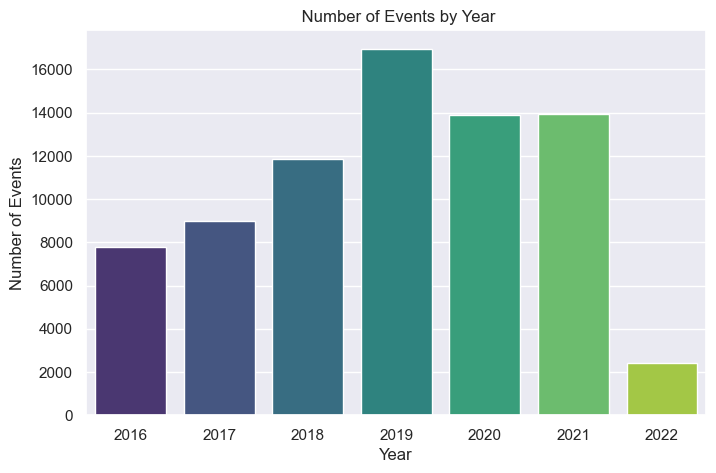

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='year', data=dv, palette='viridis')
plt.title(' Number of Events by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

* horizontal bar chart showing  top 10 most common event types. It highlights which type of event occurred frequently in the dataset.*

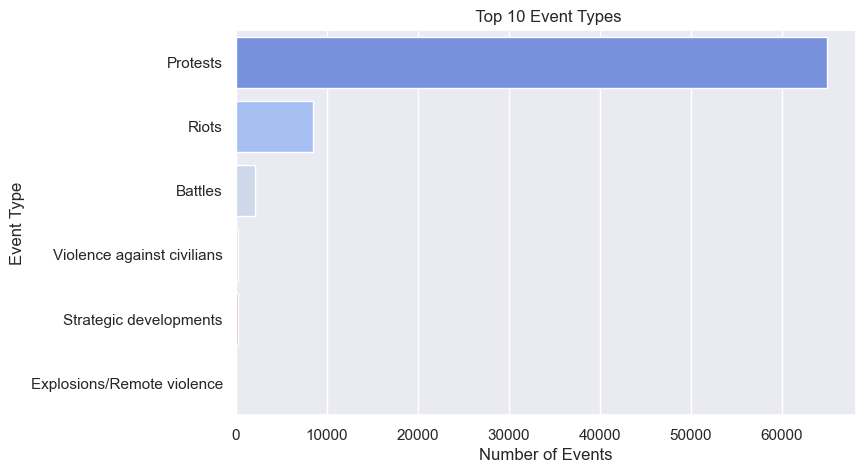

In [21]:
plt.figure(figsize=(8, 5))
top_event_types = dv['event_type'].value_counts().nlargest(10)
sns.barplot(x=top_event_types.values, y=top_event_types.index, palette='coolwarm')
plt.title(' Top 10 Event Types')
plt.xlabel('Number of Events')
plt.ylabel('Event Type')
plt.show()

 **Shows monthly event trends over time with yearly comparison.**

**This chart shows that some months had more events than others. For example, protest activity often increases in certain political seasons or after controversial events**

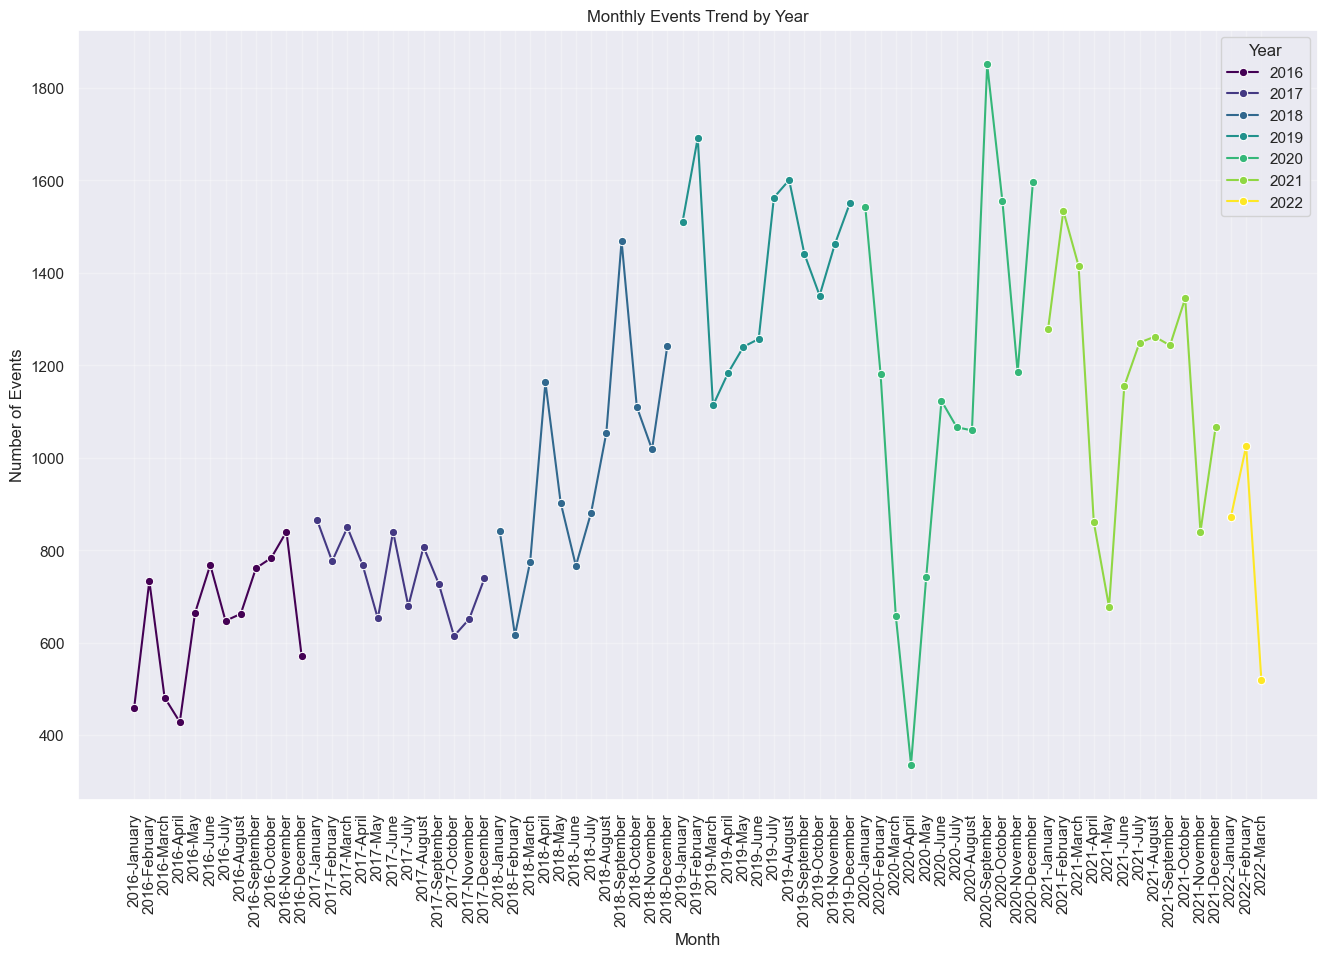

In [22]:

monthly_events = dv.groupby(['year', 'month_num', 'month']).size().reset_index(name='count')

monthly_events = monthly_events.sort_values(['year', 'month_num'])

monthly_events['year_month'] = monthly_events['year'].astype(str) + '-' + monthly_events['month']

plt.figure(figsize=(16, 10))
sns.lineplot(
    data=monthly_events,
    x='year_month',
    y='count',
    hue='year',  # Color by year
    marker='o',
    palette='viridis'  # Different color for each year
)


plt.title('Monthly Events Trend by Year')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)



plt.legend(title='Year')

plt.show()

#### **Bar plot showing total number of deaths resulting from each recorded incident/event**

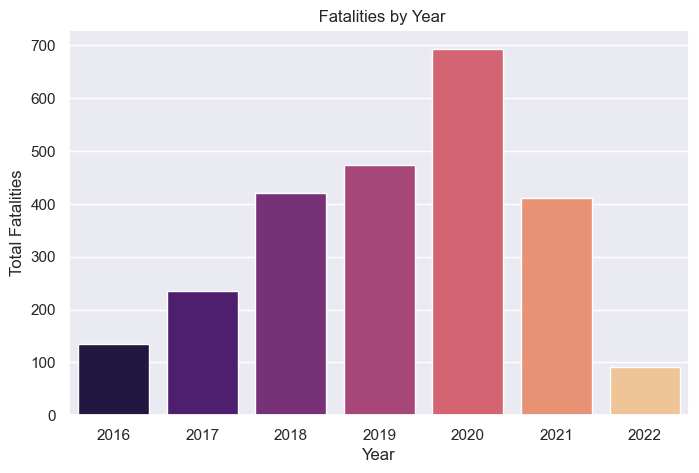

In [23]:
#  Deaths per Year
fatal_by_year = dv.groupby('year')['fatalities'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=fatal_by_year.index, y=fatal_by_year.values, palette='magma')
plt.title(' Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.show()


### **Shows distribution of event types that resulted in fatalities.**

Not all protests are violent, but this chart shows which types resulted in deaths. Riots and certain clashes caused more fatalities

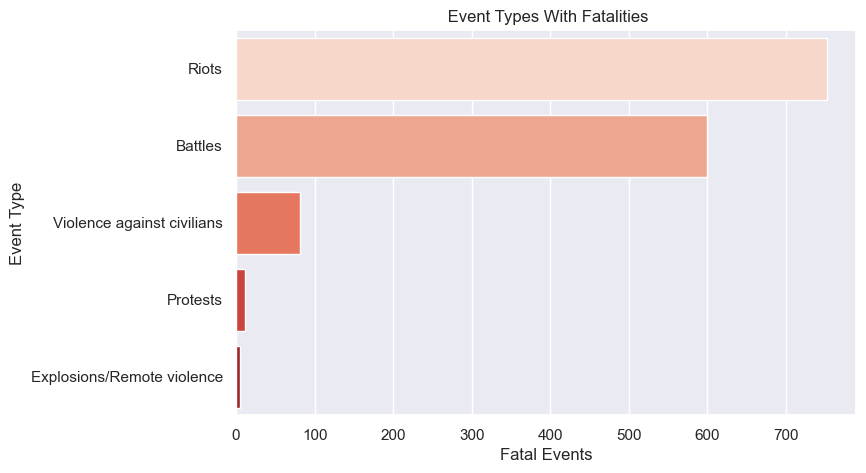

In [24]:
#  Distribution of Event Types with Deaths > 0
fatal_events = dv[dv['fatalities'] > 0]
fatal_event_types = fatal_events['event_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fatal_event_types.values, y=fatal_event_types.index, palette='Reds')
plt.title(' Event Types With Fatalities')
plt.xlabel('Fatal Events')
plt.ylabel('Event Type')
plt.show()


**Left: Locations with highest fatalities**

**Right: States with most events**

This compares hotspot cities (where the deadliest events occurred) with states that had the most total events

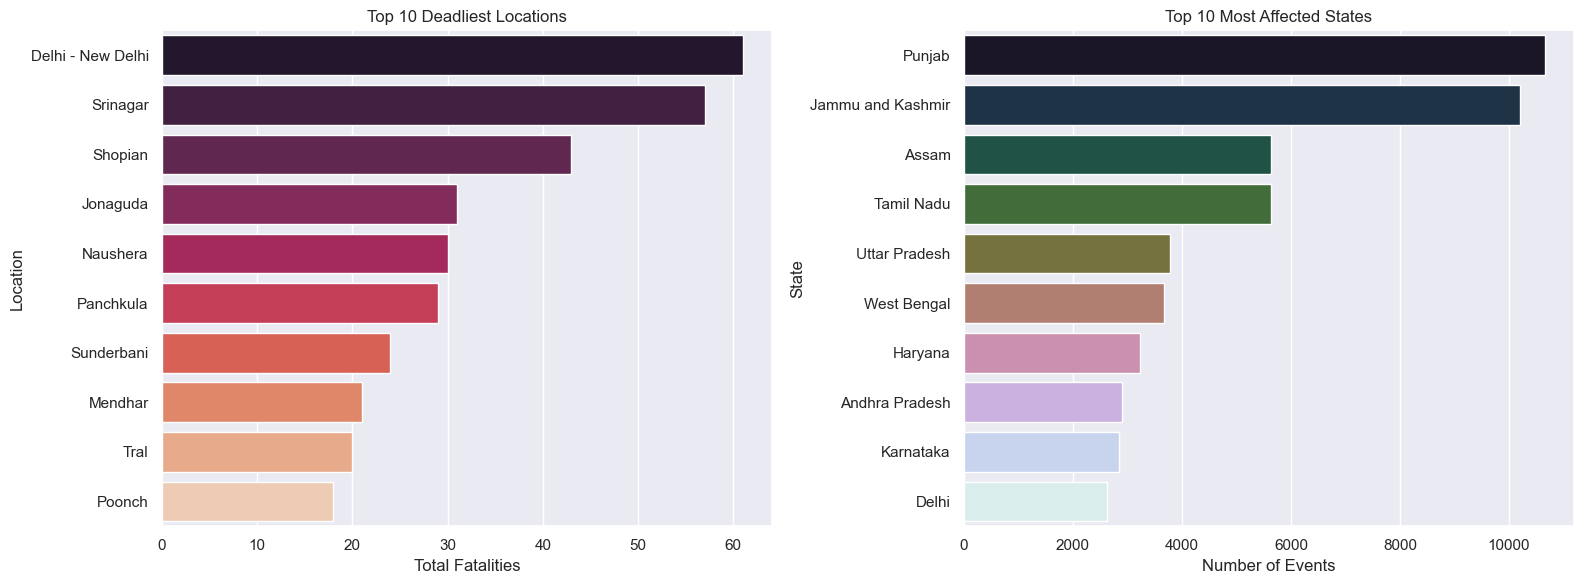

In [25]:

top_deadly_locs = dv.groupby('location')['fatalities'].sum().nlargest(10)
top_states = dv['State'].value_counts().nlargest(10)


plt.figure(figsize=(16, 6))

# Subplot 1: Top Deadliest Locations
plt.subplot(1, 2, 1)
sns.barplot(x=top_deadly_locs.values, y=top_deadly_locs.index, palette='rocket')
plt.title('Top 10 Deadliest Locations')
plt.xlabel('Total Fatalities')
plt.ylabel('Location')

# Subplot 2: Top Affected States
plt.subplot(1, 2, 2)
sns.barplot(x=top_states.values, y=top_states.index, palette='cubehelix')
plt.title('Top 10 Most Affected States')
plt.xlabel('Number of Events')
plt.ylabel('State')

plt.tight_layout()
plt.show()

**Shows event locations as clustered markers with event details in popups.**

An interactive map with clickable event markers.
Each dot represents an event. When zoomed in, you can click to see more details about the event. This gives a geographical view of protest activity.

In [ ]:
d = folium.Map(location=[22.9734, 78.6569], zoom_start=5)
marker_cluster = MarkerCluster().add_to(d)


for row in dv.itertuples():
    folium.Marker(
        location=[row.latitude, row.longitude],
        popup=f"{row.event_type}<br>{row.location}"
    ).add_to(marker_cluster)

d

**Visualizes the sub-event types with highest fatality counts.**

This tells us which specific protest causes are most dangerous. For example, mob violence and police force clashes were very deadly.

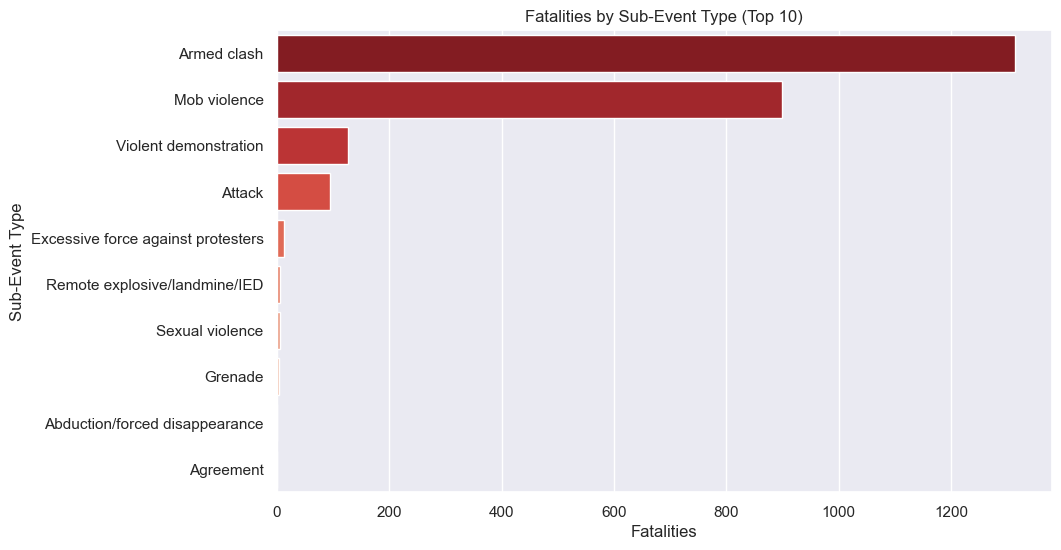

In [26]:
fatal_by_sub_event = dv.groupby('sub_event_type')['fatalities'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fatal_by_sub_event.values[:10], y=fatal_by_sub_event.index[:10], palette='Reds_r')
plt.title('Fatalities by Sub-Event Type (Top 10)')
plt.xlabel('Fatalities')
plt.ylabel('Sub-Event Type')
plt.show()


**Shows the average number of fatalities per event type, sorted from highest to lowest.**

Even though some events happen less often, they are more deadly on average. This helps identify the most dangerous types of unrest.

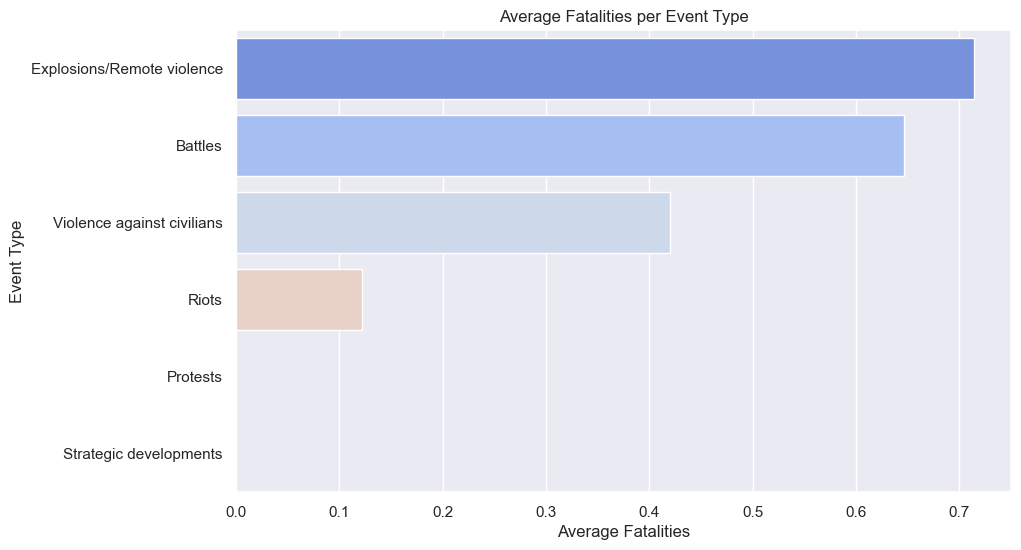

In [27]:
avg_fatal_by_type = dv.groupby('event_type')['fatalities'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fatal_by_type.values, y=avg_fatal_by_type.index, palette="coolwarm")
plt.title("Average Fatalities per Event Type")
plt.xlabel("Average Fatalities")
plt.ylabel("Event Type")
plt.show()


**A map with dots (scatter points), where each dot represents an event from the dv DataFrame.Different colors show different event_types (e.g., protests, battles, etc.).**



An interactive scatter map by event type.
This map uses different colors to show different types of events. It helps us compare how different protest types are spread across India.

In [28]:
import plotly.express as px
fig = px.scatter_mapbox(dv, lat="latitude", lon="longitude", 
                        color="event_type", zoom=5,
                        mapbox_style="carto-positron", height=500)
fig.show()
 

**Donut chart showing event distribution across top 10 states with percentage breakdown.**

These 10 states account for a large portion of total events. Uttar Pradesh, Maharashtra, and West Bengal are the most affected.

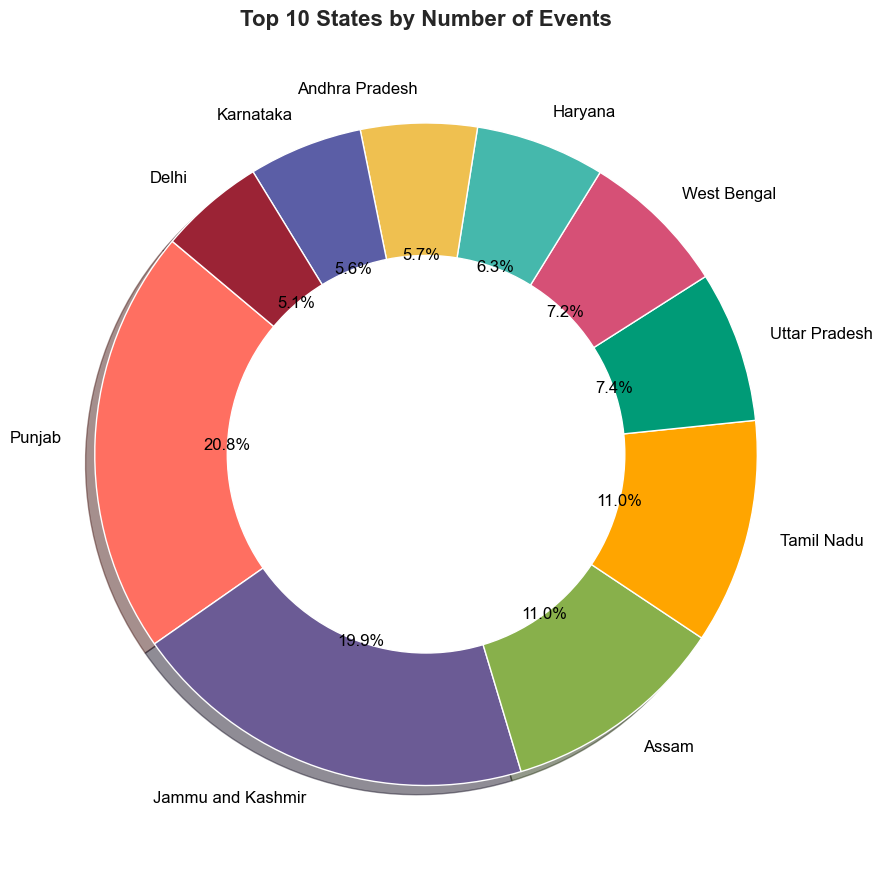

In [29]:
State_counts = dv['State'].value_counts().nlargest(10)
labels = State_counts.index
sizes = State_counts.values

# Custom vibrant color palette
bright_colors = [
    "#FF6F61", "#6B5B95", "#88B04B", "#FFA500", "#009B77",
    "#D65076", "#45B8AC", "#EFC050", "#5B5EA6", "#9B2335"
]



# Plot
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=bright_colors,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Donut-style center circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)

# Title & layout
plt.title("Top 10 States by Number of Events", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In conclusion, our analysis revealed that while protests are the most common form of civil unrest in India, not all are violent. Certain states like Uttar Pradesh and Maharashtra consistently saw more activity. Visualizations helped us spot yearly and regional patterns, showing how data can effectively highlight social and political trends.